In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [51]:
# Path to data downloaded from Kaggle
PATH_DATA = "/home/pscl/Datasets/game-of-thrones/"
# The names of the datafiles from Kaggle
filenames = ["battles.csv", "character-deaths.csv", "character-predictions.csv"]
# But the data in a dictionary with corresponding label
data = dict(zip(["Battles", "Deaths", "Predictions"], [pd.read_csv(PATH_DATA + fn) for fn in filenames]))

In [285]:
data["Battles"].location.unique()

array(['Golden Tooth', "Mummer's Ford", 'Riverrun', 'Green Fork',
       'Whispering Wood', 'Darry', 'Moat Cailin', 'Deepwood Motte',
       'Stony Shore', "Torrhen's Square", 'Winterfell', 'Oxcross',
       "Storm's End", 'Red Fork', 'Harrenhal', 'Crag', "King's Landing",
       'Duskendale', nan, 'Ruby Ford', 'The Twins', 'Seagard',
       'Castle Black', 'Saltpans', 'Shield Islands',
       'Ryamsport, Vinetown, Starfish Harbor', 'Dragonstone', 'Raventree'],
      dtype=object)

### Battles per region visualized 

In [272]:
from PIL import Image, ImageDraw

deaths_per_region = data["Battles"].region

unique_regions = data["Battles"].region.unique()
battle_counts = data["Battles"].region.value_counts()

coords =  { 'The Westerlands':(150, 550),
            'The Riverlands': (250, 550),
            'The North':      (260, 350),
            'The Stormlands': (450, 820),
            'The Crownlands': (400, 620),
            'Beyond the Wall':(230,  20),
            'The Reach':      (220, 710) }

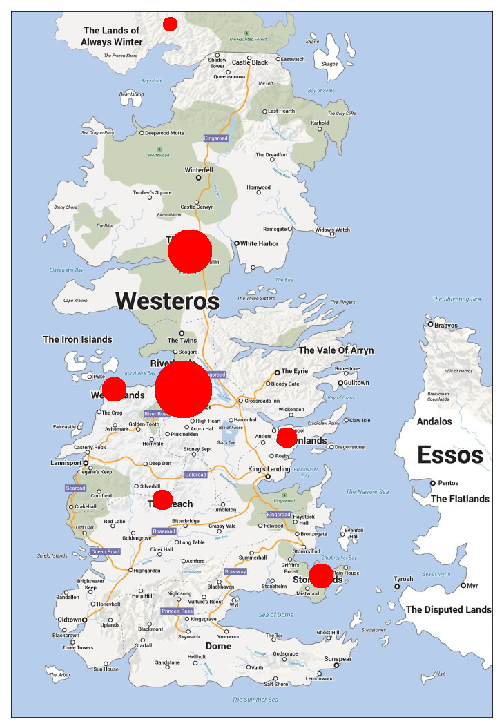

In [281]:
map_image = Image.open("game-of-thrones-map-698x1024.jpg")
# Create image draw object to paint circles
draw = ImageDraw.Draw(map_image)
for region_name in unique_regions:
    r = np.sqrt((battle_counts[region_name]))*10
    #r = battle_counts[region_name]
    x, y = coords[region_name]
    box = [x-r,y-r,x+r,y+r]
    draw.ellipse(box, fill='red')

fig = plt.figure(figsize=(13,13))
plt.imshow(map_image)
plt.yticks([]); plt.xticks([])
plt.show()

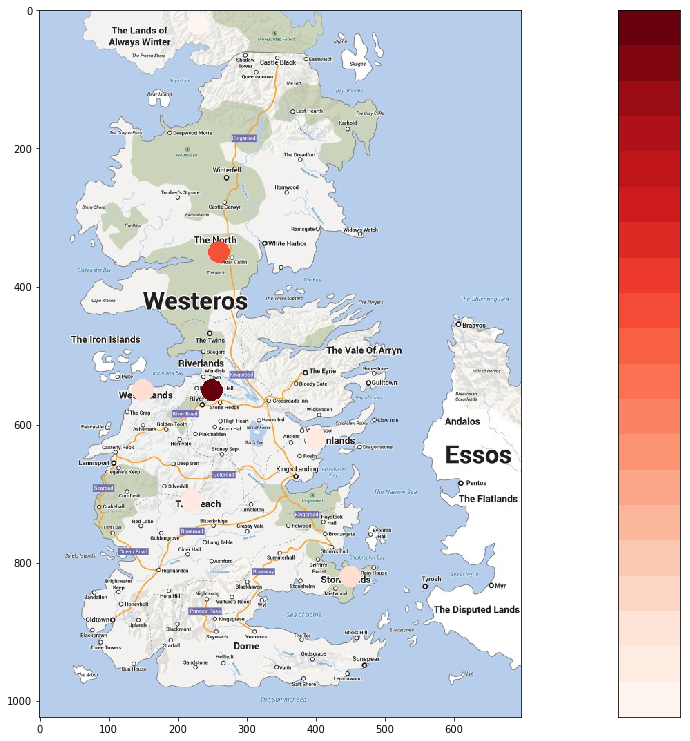

In [282]:
map_image = Image.open("game-of-thrones-map-698x1024.jpg")

# Choose a colormap
cmap = plt.cm.get_cmap('Reds')
# Create image draw object to paint circles
draw = ImageDraw.Draw(map_image)
for region_name in unique_regions:
    r = 15 #(battle_counts[region_name]) * 4
    x, y = coords[region_name]
    box = [x-r,y-r,x+r,y+r]
    color = cmap( (battle_counts[region_name]-min(battle_counts)) / (max(battle_counts)-min(battle_counts)) )
    c_shift = 0
    draw.ellipse(box, fill=(int(color[0]*255+c_shift),int(color[1]*255+c_shift),int(color[2]*255+c_shift), int(color[3]*255+c_shift)))

fig = plt.figure(figsize=(13,13))
ax1 = plt.subplot2grid((10, 10), (0, 0), colspan=9,rowspan=10)
ax1.imshow(map_image)

# set everything up to display the Colormap / legend for the circle's colors
a = np.outer(np.arange(0,20), np.ones(3))
ax2 = plt.subplot2grid((10, 10), (0, 9),rowspan=10)
plt.imshow(a, aspect='auto', cmap='Reds', origin="lower")
ax2.get_xaxis().set_ticks([])
ax2.get_yaxis().set_ticks(np.arange(0, 20))
ax2.yaxis.tick_right()
plt.yticks([]); plt.xticks([])
plt.show()

### Battles per region plotted

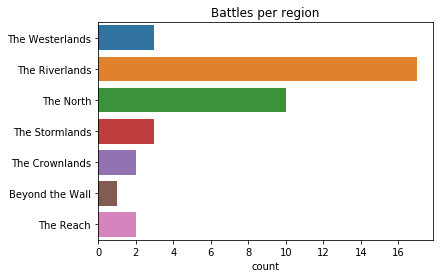

In [286]:
sns.countplot(y=data["Battles"].region)
plt.title("Battles per region")
plt.ylabel("")
plt.show()

### Houses and Kings involved in battle

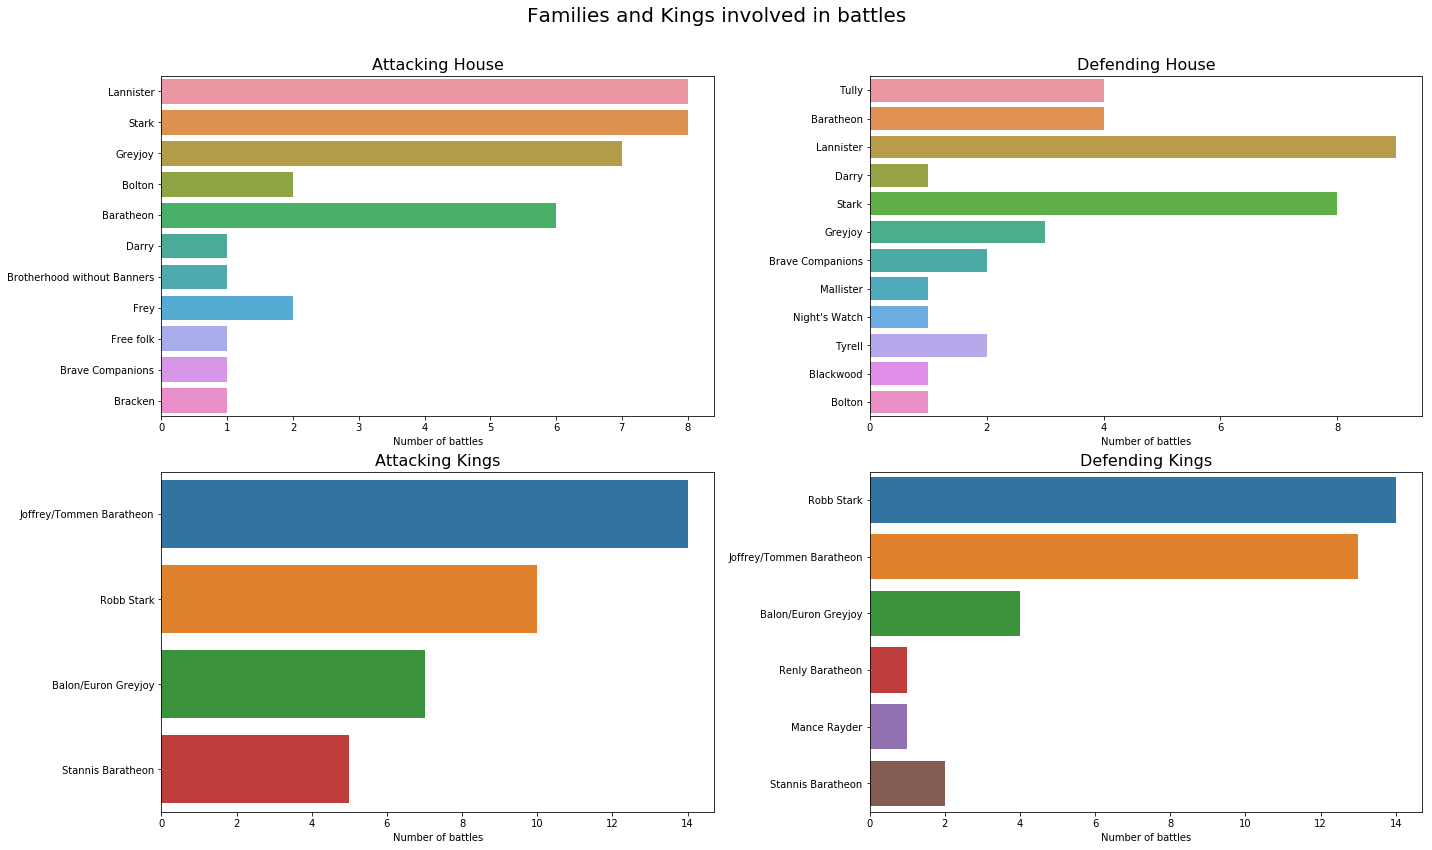

In [267]:
fig = plt.figure(figsize=(20,12))

# Most common attackers
fig.add_subplot(221)
plt.title("Attacking House", size=16)
sns.countplot(y="attacker_1", data=data["Battles"])
plt.ylabel("")
plt.xlabel("Number of battles")

# Most common defenders
fig.add_subplot(222)
plt.title("Defending House", size=16)
sns.countplot(y="defender_1", data=data["Battles"])
plt.ylabel("")
plt.xlabel("Number of battles")

# Kings that attacked
fig.add_subplot(223)
plt.title("Attacking Kings", size=16)
sns.countplot(y="attacker_king", data=data["Battles"])
plt.ylabel("")
plt.xlabel("Number of battles")

# Kings that defended
fig.add_subplot(224)
plt.title("Defending Kings", size=16)
sns.countplot(y="defender_king", data=data["Battles"])
plt.ylabel("")
plt.xlabel("Number of battles")

fig.tight_layout()
fig.suptitle("Families and Kings involved in battles", size=20)
fig.subplots_adjust(top=0.9)
plt.show()

### Deaths by allegiance

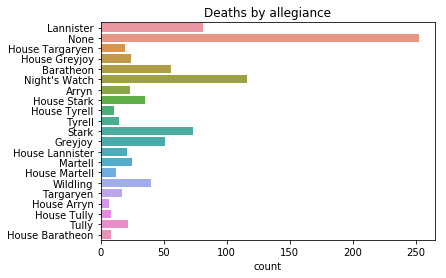

In [269]:
# Most people died in the night's watch
sns.countplot(y="Allegiances", data=data["Deaths"])
plt.title("Deaths by allegiance")
plt.ylabel("")
plt.show()

### Length of character lifes in chapters

In [194]:
chapters = data["Deaths"].dropna(subset=["Book Intro Chapter", "Death Chapter"])[["Death Chapter","Book Intro Chapter"]]

chapter_life = (chapters["Death Chapter"] - chapters["Book Intro Chapter"])
chapter_life = chapter_life[chapter_life > 0]

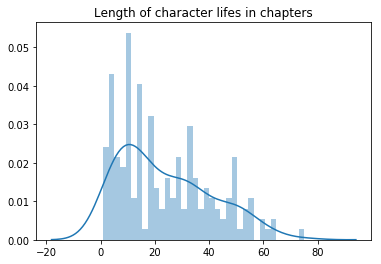

In [195]:
sns.distplot(chapter_life, bins=len(chapter_life)//5)
plt.title("Length of character lifes in chapters")
plt.show()

In [289]:
data["Predictions"]

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1
5,6,1,0,0.021,0.979,Tommen Baratheon,NaN,1,NaN,NaN,...,1.0,NaN,0,0,NaN,5,1,1,1.000000,1
6,7,0,0,0.014,0.986,Valarr Targaryen,Hand of the King,1,Valyrian,183.0,...,NaN,1.0,1,1,26.0,0,0,1,0.431438,0
7,8,0,0,0.036,0.964,Viserys I Targaryen,NaN,1,NaN,NaN,...,1.0,NaN,0,0,NaN,5,1,1,0.678930,0
8,9,0,1,0.724,0.276,Wilbert,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.006689,0
9,10,1,0,0.391,0.609,Wilbert Osgrey,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.020067,1


In [ ]:
# Null-hypothesis: Married people do not have a lower likelihood of death